In [77]:
#Importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing sklearn modules
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score,roc_curve, roc_auc_score, auc, classification_report
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

In [126]:
# import dataset 
diabetes= pd.read_csv("C:/Users/kezen/OneDrive/Documents/Microsoft/data/diabetes.csv", delimiter=",", header="infer")
diabetes.drop(columns= ["PatientID"], inplace=True)

# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
x = diabetes[features].values 
y =diabetes[label].values

# split data 70% to training and test dataset: 70% to training and 30% to testing dataset 
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 100) # random_state ensures reproducibility

In [79]:
# Set up different machine learning models 
models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("NB", GaussianNB()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("Adaboost", AdaBoostClassifier()))
models.append(("XGBoost", XGBClassifier(use_label_encoder= False)))


In [82]:
# Evaluate model performance
results = []
names = []
scoring = "accuracy"
#perform cross validation 
for name, model in models:
    kfold = model_selection.KFold(n_splits= 10, random_state= None) # set up cross validation
    cv_results = model_selection.cross_val_score(model, x_train, y_train, scoring = scoring, cv = kfold)
    results.append(cv_results)
    names.append(name)
    output = f"{name}: Mean = {round(cv_results.mean(),2)}, STD: {round(cv_results.std(), 6)}"
    print(output)


C:\Users\kezen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kezen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR: Mean = 0.78, STD: 0.017392
LDA: Mean = 0.79, STD: 0.010451
KNN: Mean = 0.84, STD: 0.007284
NB: Mean = 0.79, STD: 0.016201
CART: Mean = 0.89, STD: 0.00943
RF: Mean = 0.93, STD: 0.009515
Adaboost: Mean = 0.95, STD: 0.004611
[17:35:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kezen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\kezen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:35:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kezen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:35:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kezen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:35:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kezen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:35:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kezen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:35:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kezen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:35:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kezen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:35:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kezen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:35:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kezen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:35:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost: Mean = 0.95, STD: 0.003909


XGBoost has the highest accuracy (0.95) on the traininig dataset. Therefore build final model using Adaboost


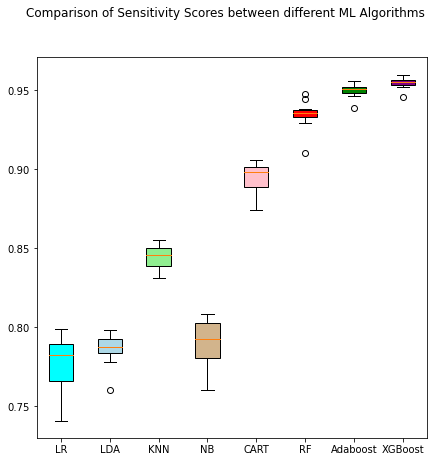

In [83]:
# plot boxplot comparing the algorithms 
fig = plt.figure(figsize = (7,7))
fig.suptitle("Comparison of Sensitivity Scores between different ML Algorithms")
ax = fig.add_subplot(111)
box = plt.boxplot(results, patch_artist= True)
ax.set_xticklabels(names)
colors = ['cyan', 'lightblue', 'lightgreen', 'tan', 'pink', "red", "green", "purple"]
for patch, color in zip(box["boxes"], colors):
    patch.set_facecolor(color)
plt.show()



In [93]:
final_model = XGBClassifier(random_state= 100).fit(x_train, y_train)
# make predictions on the test data set 
predictions = final_model.predict(x_test)
# create dataframe of predictions vs actual values 
df = pd.DataFrame({
    "Actual_values": y_test,
    "Predicted_values": predictions
})
df.sample(10)


C:\Users\kezen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:57:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Actual_values,Predicted_values
2473,0,0
470,0,0
1262,0,0
100,1,1
3366,0,0
728,0,0
1211,0,0
135,0,0
1776,0,0
633,0,0


In [94]:
# evaluate model performance 
accuracy = np.round(accuracy_score(y_test, predictions), 2)
recall = np.round(recall_score(y_test, predictions), 2)
precision = np.round(precision_score(y_test, predictions), 2)
print(f"\nAccuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, predictions)
print("Confusion Matrix:", "\n", cm)



Accuracy: 0.95
Recall: 0.92
Precision: 0.94
Confusion Matrix: 
 [[2915   91]
 [ 113 1381]]


Check if tuning hyperparameters will improve performance 

In [154]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [104]:
# set up hyperparameters grid
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.5, 0.7]}

# set up scoring metrics 
scoring = "accuracy"

# set the algorithm
alg = XGBClassifier(random_state= 100,  use_label_encoder = False, eval_metric = "logloss")

# hyperparemeters combination
grid_search = GridSearchCV(alg, params, scoring = scoring, cv = 3, return_train_score= True, verbose= 1)

grid_search.fit(x_train, y_train)

#get the best hyperparameter combination 
best_params= grid_search.best_params_
# get best score
best_score= grid_search.best_score_
print("\nbest score:", best_score)
print("\best params:", best_params)
## get the best performing model 
best_model = grid_search.best_estimator_
print("\nbest model:", best_model)

# fit using best model
model = best_model.fit(x_train, y_train)


Fitting 3 folds for each of 81 candidates, totalling 243 fits

best score: 0.9647619047619047
est params: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1000}

best model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, eval_metric='logloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, num_parallel_tree=1,
              predictor='auto', random_state=100, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


In [153]:
# make predictions on the test data set 
predictions = model.predict(x_test)
# create dataframe of predictions vs actual values 
df = pd.DataFrame({
    "Actual_values": y_test,
    "Predicted_values": predictions
})
df.sample(10)

,Actual_values,Predicted_values
2826,0,1
328,0,1
3684,0,1
262,0,1
494,0,1
2116,0,1
1252,0,1
4056,1,1
3035,1,1
3446,0,1


In [107]:
# evaluate model performance 
accuracy = np.round(accuracy_score(y_test, predictions), 2)
recall = np.round(recall_score(y_test, predictions), 2)
precision = np.round(precision_score(y_test, predictions), 2)
print(f"\nAccuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, predictions)
print("Confusion Matrix:", "\n", cm)
class_report = classification_report(y_test, predictions)
print("classification report:", "\n", class_report)


Accuracy: 0.96
Recall: 0.93
Precision: 0.95
Confusion Matrix: 
 [[2940   66]
 [ 108 1386]]
classification report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      3006
           1       0.95      0.93      0.94      1494

    accuracy                           0.96      4500
   macro avg       0.96      0.95      0.96      4500
weighted avg       0.96      0.96      0.96      4500



slight improvement in accuracy score from tuning the hyperparameters

finally check if processing improves result 

In [165]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode the Age column)
categorical_features = [7]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('xgb', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, eval_metric='logloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1,  monotone_constraints='()',
              n_estimators=1000, n_jobs=8, num_parallel_tree=1,
              predictor='auto', random_state=100, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None))])

# fit the pipeline to train a extreme gradient boost  model on the training set
model = pipeline.fit(x_train, (y_train))
print(model)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.3, enable_categorical=F...
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.01

In [174]:
# get feature importance 

m

[('preprocessor',
  ColumnTransformer(transformers=[('num',
                                   Pipeline(steps=[('scaler', StandardScaler())]),
                                   [0, 1, 2, 3, 4, 5, 6]),
                                  ('cat',
                                   Pipeline(steps=[('onehot',
                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                   [7])])),
 ('xgb',
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=0.3,
                enable_categorical=False, eval_metric='logloss', gamma=0,
                gpu_id=-1, importance_type=None, interaction_constraints='',
                learning_rate=0.01, max_delta_step=0, max_depth=10,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=1000, n_jobs=8, num_parallel_tree=1,
                predictor='auto', random_state=100, reg_

In [158]:
for index, name in enumerate(diabetes.columns):
    print(f"Features {index}: {name}")

Features 0: Pregnancies
Features 1: PlasmaGlucose
Features 2: DiastolicBloodPressure
Features 3: TricepsThickness
Features 4: SerumInsulin
Features 5: BMI
Features 6: DiabetesPedigree
Features 7: Age
Features 8: Diabetic


In [167]:
# make predictions on the test data set 
predictions = model.predict(x_test)
# create dataframe of predictions vs actual values 
df = pd.DataFrame({
    "Actual_values": y_test,
    "Predicted_values": predictions
})
df.sample(10)

,Actual_values,Predicted_values
2270,0,0
1515,0,0
2632,0,0
1379,0,0
3603,0,0
2495,0,0
469,0,0
4087,0,0
2680,0,0
4362,1,1


In [169]:
# evaluate model performance 
accuracy = np.round(accuracy_score(y_test, predictions), 2)
recall = np.round(recall_score(y_test, predictions), 2)
precision = np.round(precision_score(y_test, predictions), 2)
print(f"\nAccuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, predictions)
print("Confusion Matrix:", "\n", cm)
class_report = classification_report(y_test, predictions)
print("classification report:", "\n", class_report)


Accuracy: 0.96
Recall: 0.93
Precision: 0.95
Confusion Matrix: 
 [[2933   73]
 [ 108 1386]]
classification report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      3006
           1       0.95      0.93      0.94      1494

    accuracy                           0.96      4500
   macro avg       0.96      0.95      0.95      4500
weighted avg       0.96      0.96      0.96      4500



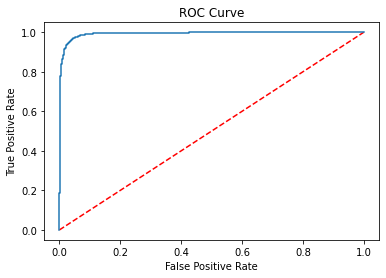

In [161]:
# plot the ROC Curve

#ROC Curve shows the curve of the true and false positive rates.

from sklearn.metrics import roc_curve, roc_auc_score
# get probailities of th predictions 
y_scores  = model.predict_proba(x_test)

# calculate the ROC Curve 
fpr, tpr, thresholds = roc_curve(y_true= y_test, y_score= y_scores[:,1])
# plot the 50% diagonal line 
plt.plot([0,1], [0,1], "r--")
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()